In [75]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
# load, clean and process data

df = pd.read_csv('data processing/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

cleaned = df.loc[(df['submission_date'].notnull()) & (df['tot_cases'].notnull())\
             & (df['conf_cases'].notnull()) & (df['prob_cases'].notnull())]

model_data = cleaned[['submission_date', 'tot_cases', 'conf_cases', 'prob_cases']]
model_data = model_data.groupby('submission_date').agg({'tot_cases':'sum','conf_cases':'sum', 'prob_cases':'sum'})
model_data = model_data.reset_index()
model_data

,submission_date,tot_cases,conf_cases,prob_cases
0,01/01/2021,10150018,9142829.0,1007189.0
1,01/02/2021,10303087,9276905.0,1026182.0
2,01/03/2021,10391680,9354307.0,1037373.0
3,01/04/2021,10479889,9427704.0,1052185.0
4,01/05/2021,11140076,10011263.0,1128813.0
...,...,...,...,...
459,12/27/2020,9657952,8749676.0,908276.0
460,12/28/2020,9751733,8829664.0,922069.0
461,12/29/2020,9844232,8897458.0,946774.0
462,12/30/2020,9964998,8989902.0,975096.0


In [144]:
# split the data and fit 

dates = model_data['submission_date']
dates = pd.to_datetime(dates).to_frame()
cases = model_data['tot_cases'].to_frame()

# train-test split
# 70 % train
# 15 % validation
# 15 % test
X_train, X_test, y_train, y_test = train_test_split(dates, cases, test_size=0.30, random_state=42)

X_train_int = X_train.squeeze().map(datetime.toordinal).to_frame()
X_test_int = X_test.squeeze().map(datetime.toordinal).to_frame()

# fit
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
# polynomial_features = PolynomialFeatures(degree = 5)
# X_train_transf = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_int, y_train)

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

3674247.016622766
0.888510733879807


<Figure size 1200x1200 with 0 Axes>

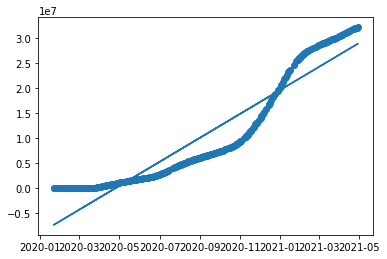

<Figure size 1200x1200 with 0 Axes>

In [114]:
# test
y_new_pred = model.predict(X_train_int)

# calculate bias and variance
rmse = np.sqrt(mean_squared_error(y_train,y_new_pred))
r2 = r2_score(y_train,y_new_pred)
print(rmse)
print(r2)

# plot some stuff
plt.scatter(X_train, y_train)
plt.plot(X_train, y_new_pred)
figure(figsize=(15, 15), dpi=80)

3881132.704130898
0.8750791029679099


<function matplotlib.pyplot.show(close=None, block=None)>

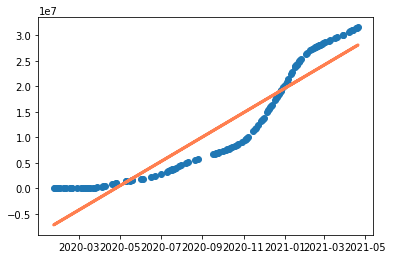

In [117]:
# predict
#X_test_transf = polynomial_features.fit_transform(X_test)
y_pred = model.predict(X_test_int)

# calculate bias and variance
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

# plot 
plt.plot(X_test, y_pred, color='coral', linewidth=3)
plt.scatter(X_test, y_test)
plt.show